In [1]:
import requests
import pandas as pd
import numpy as np
import json 
import folium #Grafcar mapas
import matplotlib.pyplot as plt
import seaborn as sns 
from geopy.geocoders import Nominatim #Obtener coordenadas a partir de una direccion.
from textblob import TextBlob   #Analsiis de sentimientos para reseñas de los restaurantes

In [2]:
CLIENT_ID = '55S2ZJJJVK3T1D1ZDNQLHEAH15HG4AHHMYJZNETKJK5EXKBB' # su ID de Foursquare
CLIENT_SECRET = 'NRH3ODLT453CFZY2C0P33DJEDKCXROHBNC1OQSMT52ST3TD4' # su Secreto de Cliente de Foursquare
VERSION = '20180604'
LIMIT = 30

### 1. Busquemos lugares donde se vendan comida marina

Proceso para la creacion de una funcion para buscar Venues en relacion a una direccion.
- Paraametro 1 definifion de la direccion.
- Parametro 2 definicion de que es lo que se busca.
- Parametro 3 Radio de busqueda

In [3]:
def get_restaurant_data(address, search_query, radius):
    # Use the Geocoding API to retrieve the latitude and longitude of the input address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude

    # Use the Foursquare API to search for restaurants within the specified radius of the input address
    url = f'https://api.foursquare.com/v3/places/search?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&ll={latitude},{longitude}&v={VERSION}&query={search_query}&radius={radius}&limit={LIMIT}'
    headers = {
        "Accept": "application/json",
        "Authorization": "fsq3a5oXiMEiuZYusTTUUGz8CHLfGZvmouDBQSuiyW4QVys="
    }
    results = requests.request("GET", url, headers=headers).json()

    # Create an empty list to store the extracted data
    data = []

    # Loop through the JSON response and extract the relevant fields
    for result in results['results']:
        fsq_id = result['fsq_id']
        name = result['name']
        distance = result['distance']
        latitude = result['geocodes']['main']['latitude']
        longitude = result['geocodes']['main']['longitude']
        category_name = result['categories'][0]['name']
        address = result['location']['formatted_address']

        if 'locality' in result['location']:
            locality = result['location']['locality']
        else:
            locality = None
        
        if 'region' in result['location']:
            region = result['location']['region']
        else:
            region = None
        
        # Append the extracted data to the list
        data.append([fsq_id, name, distance, latitude, longitude, category_name, address, locality, region])

    # Create a pandas DataFrame from the extracted data and set the column names
    df = pd.DataFrame(data, columns=['fsq_id', 'name', 'distance', 'latitude', 'longitude', 'category_name', 'address', 'locality', 'region'])
    return location, df

In [9]:
address = '5101 Blue Lagoon Dr, Miami, FL 33126, Estados Unidos' #Parametro 1
search_query = 'Seafood' #parametro 2
radius = 5000 #Parametro 3

loc, df = get_restaurant_data(address, search_query, radius)

In [10]:
latitude = loc.latitude
longitude = loc.longitude
hotel_name = loc.address.split(',')[0]

In [11]:
df

,fsq_id,name,distance,latitude,longitude,category_name,address,locality,region
0,4adb817bf964a5205a2821e3,Catch of the Day,1427,25.782260,-80.264408,Caribbean Restaurant,"1050 NW 42nd Ave (NW 11th Street), Miami, FL 3...",Miami,FL
1,54d29363498e5149ab99b854,MesaMar Seafood Table,3877,25.750955,-80.260181,Restaurant,"264 Giralda Ave (Le June Road), Coral Gables, ...",Coral Gables,FL
2,5845e9ebe612f25f602890ec,Fresh Florida Fisheries,3699,25.749636,-80.287687,Seafood Restaurant,"2238 SW 57th Ave, Coral Terrace, FL 33155",Coral Terrace,FL
3,4db0bd916e81a2637ede8ff3,Orgullo Catracho,4913,25.765171,-80.233050,Latin American Restaurant,"2300 SW 8th St, Miami, FL 33135",Miami,FL
4,4b396698f964a5200a5c25e3,Disco Fish Market & Restaurant,3837,25.756013,-80.303930,Cuban Restaurant,"1540 SW 67th Ave, Miami, FL 33144",Miami,FL
5,4b0d773ef964a520e04823e3,Bahamas Fish Market,3980,25.762553,-80.312055,Seafood Restaurant,"7200 SW 8th St, Miami, FL 33144",Miami,FL
6,4cb73122651cb71310153b3a,POC American Fusion Buffet & Sushi,3740,25.753336,-80.258479,New American Restaurant,"2121 Ponce De Leon Blvd, Coral Gables, FL 33134",Coral Gables,FL
7,4c0c077f009a0f472705ecbf,Sonias Seafood,4483,25.762964,-80.318011,Caribbean Restaurant,"7501 SW 8th St, Miami, FL 33144",Miami,FL
8,4f32a36119836c91c7eb3db6,Caribbean Queen Seafood,2688,25.801355,-80.262631,Seafood Restaurant,"4025 NW 28th St, Miami, FL 33142",Miami,FL
9,4e4c7cdebd413c4cc669c03b,Covadonga Seafood Restaurant,3121,25.763003,-80.301561,Seafood Restaurant,"6480 SW 8th St, West Miami, FL 33144",West Miami,FL


Definicion de centro del mapa en relacion a la direccion establecida en el parametro 1, el parametro 1 sera graficado con color rojo, mientras que los resultados en color azul en el radio de busqueda definido.


In [12]:
# Create map centered on hotel location
hotel_map = folium.Map(location=[latitude, longitude], zoom_start=15)

# Add marker for hotel
folium.Marker(
    location=[latitude, longitude], 
    popup=hotel_name,
    icon=folium.Icon(color='red')
).add_to(hotel_map)

# Add markers for other points
for idx, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['name']).add_to(hotel_map)

# Display the map
hotel_map

### Exploremos los lugares mas cercanos

data Frame para obtener los 5 lugares mas cercanos.

In [13]:
def get_closest_places(df):   
    # Sort the dataframe by distance
    df_sorted = df.sort_values(by='distance')

    # Get the 5 shortest distances
    df_shortest = df_sorted.head(5)
    return df_shortest

In [15]:
df_shortest = get_closest_places(df)

Obtencion de ratings y deviews.

In [16]:
def get_rate_reviews(fsq_id):
    """
    Function to get the rate and reviews of a place using the Foursquare API by the `fsq_id`.
    """
    url = 'https://api.foursquare.com/v3/places/{}?client_id={}&client_secret={}&v={}'.format(fsq_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    headers = {
        "Accept": "application/json",
        "Authorization": "fsq3a5oXiMEiuZYusTTUUGz8CHLfGZvmouDBQSuiyW4QVys="
    }
    result = requests.request("GET", url, headers=headers).json()
    
    if 'rating' in result:
        rating = result['rating']
    else:
        rating = 'NA'
        
    if 'user_ratings_total' in result:
        reviews = result['user_ratings_total']
    else:
        reviews = 'NA'
    
    return rating, reviews

In [17]:
df_shortest = df_shortest.copy()
df_shortest[['rating', 'reviews']] = df['fsq_id'].apply(get_rate_reviews).apply(pd.Series)
df_shortest

,fsq_id,name,distance,latitude,longitude,category_name,address,locality,region,rating,reviews
20,4b2ada1cf964a520d8b024e3,94th Aero Squadron,982,25.785010,-80.287514,American Restaurant,"1395 NW 57th Ave, Miami, FL 33126",Miami,FL,NA,NA
23,4b5f0638f964a520bfa229e3,Casa Juan Restaurant,1225,25.779081,-80.290387,Cuban Restaurant,"5755 NW 7th St, Miami, FL 33126",Miami,FL,NA,NA
0,4adb817bf964a5205a2821e3,Catch of the Day,1427,25.782260,-80.264408,Caribbean Restaurant,"1050 NW 42nd Ave (NW 11th Street), Miami, FL 3...",Miami,FL,NA,NA
27,4b5a0c54f964a520eda928e3,El Palacio De Los Jugos,1550,25.770993,-80.288543,Caribbean Restaurant,"5721 W Flagler St, Miami, FL 33144",Miami,FL,NA,NA
24,5a1dd199a879213b6c70bedf,American Airlines Flagship Lounge,1730,25.797296,-80.280786,Airport Lounge,"MIA Airport, Miami, FL 33122",Miami,FL,NA,NA


In [18]:
fsq_id = df_shortest['fsq_id'].iloc[2]

Funcion para la obtencion de los reviews (Tips) de los restaurantes

In [19]:
def get_tips(fsq_id):
    url = f'https://api.foursquare.com/v3/places/{fsq_id}/tips'
    headers = {
        "Accept": "application/json",
        "Authorization": "fsq3a5oXiMEiuZYusTTUUGz8CHLfGZvmouDBQSuiyW4QVys="
    }
    result_tips = requests.request("GET", url, headers=headers).json()
    
    # Extract the tips information and create a DataFrame
    tips = []
    for item in result_tips:
        tips.append({
            'tip_id': item['id'],
            'created_at': item['created_at'],
            'text': item['text']
        })
    df_tips = pd.DataFrame(tips)
    
    return df_tips

In [20]:
pd.set_option('display.max_colwidth', None)
df_tips = get_tips(fsq_id)
df_tips

,tip_id,created_at,text
0,5ac04c36911fc42373e94666,2018-04-01T03:04:22.000Z,Next to MIA Airport Great Late Nite 10:30-11:30pm Seafood Spot Full Cocktail Bar ....Stone Crab Claws 2 for $25.00....Clam Streamers were super tiny but good
1,58bab1292948b365b212eede,2017-03-04T12:20:57.000Z,"Sooo good! Mahi Mahi was delish, along with shrimp scampi, yellow rice and veggies. Enjoyed Margaritas! Sat in patio area in evening on a Friday. Was really nice. Service terrific. Highly recommend."
2,5927835006fb606325cc78eb,2017-05-26T01:22:24.000Z,"Really great oysters! Great taste and super large, wonderful large cocktail shrimp. We grazed on all the fresh seafood"
3,57e1e1d2498ef56a7e53a784,2016-09-21T01:26:42.000Z,Gratuity is already included in the bill regardless of party size.
4,530aaae211d2a9634f34b0fd,2014-02-24T02:13:54.000Z,Sit outside and enjoy the live music. Food is fantastic and reasonable. Service was good.
5,536aa3da498e433a5654283c,2014-05-07T21:21:30.000Z,"Very nice sea food! First time here and I already loved! Shrimp, calamari, pasta, salad. Prices very honest in my opinion!"
6,55041ef9498efaee864fda0b,2015-03-14T11:43:53.000Z,Oriental Yellow Fin Tuna was excellent. Can't go wrong with the catch of the day.
7,4ec341a5722e5b8e03d4d476,2011-11-16T04:52:53.000Z,Paola and friends were awesome. Dont pay attention to previous post. I asked n they are all real. Crispy whole red snaper and coconuts covina were really outstanding.
8,50b17d50498ef078f991baf7,2012-11-25T02:07:12.000Z,"Just enjoyed a delicious paella, huge portion - plenty to share for two hungry people. Great bread! Nice, friendly service!"
9,57ec803f498e5ca046f3a2d3,2016-09-29T02:45:19.000Z,Loved the paella --portions are huge! Service was friendly and amazing


Funcion para obtencion de analisis de sentimientos para obtener las mejores reseñas.

In [21]:
def analyze_sentiment(text):
    # Create a TextBlob object representing the text
    blob = TextBlob(text)
    # Get the polarity score
    polarity = blob.sentiment.polarity
    # Categorize as positive, negative, or neutral
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'
    
def add_sentiment_column(df):
    # Add a new column with the sentiment category for each text
    df['sentiment'] = df['text'].apply(analyze_sentiment)
    return df

Adicion de la funcion de sentimientos sobre el DF de reviews.

In [22]:
df_tips_sent = add_sentiment_column(df_tips)
df_tips_sent[['text', 'sentiment']]

,text,sentiment
0,Next to MIA Airport Great Late Nite 10:30-11:30pm Seafood Spot Full Cocktail Bar ....Stone Crab Claws 2 for $25.00....Clam Streamers were super tiny but good,positive
1,"Sooo good! Mahi Mahi was delish, along with shrimp scampi, yellow rice and veggies. Enjoyed Margaritas! Sat in patio area in evening on a Friday. Was really nice. Service terrific. Highly recommend.",positive
2,"Really great oysters! Great taste and super large, wonderful large cocktail shrimp. We grazed on all the fresh seafood",positive
3,Gratuity is already included in the bill regardless of party size.,neutral
4,Sit outside and enjoy the live music. Food is fantastic and reasonable. Service was good.,positive
5,"Very nice sea food! First time here and I already loved! Shrimp, calamari, pasta, salad. Prices very honest in my opinion!",positive
6,Oriental Yellow Fin Tuna was excellent. Can't go wrong with the catch of the day.,positive
7,Paola and friends were awesome. Dont pay attention to previous post. I asked n they are all real. Crispy whole red snaper and coconuts covina were really outstanding.,positive
8,"Just enjoyed a delicious paella, huge portion - plenty to share for two hungry people. Great bread! Nice, friendly service!",positive
9,Loved the paella --portions are huge! Service was friendly and amazing,positive


funcion para obtener la cantidad de restaurantes en relacion al radio de distancia a partir de la direccion de origen.

In [30]:
def create_distance_histogram(df):
    # Bin the restaurants based on distance in increments of 100 meters
    bins = range(0, df['distance'].max() + 100, 500)
    distance_binned = pd.cut(df['distance'], bins=bins)
    
    # Count the number of restaurants in each distance bin
    counts = distance_binned.value_counts().sort_index()
    
    # Plot the histogram with seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=counts.index.astype(str), y=counts.values)
    ax.set(xlabel='Distancia (m)', ylabel='Cantidad')
    ax.set_title('Numero de Restaurantes por Distancia')
    plt.show()

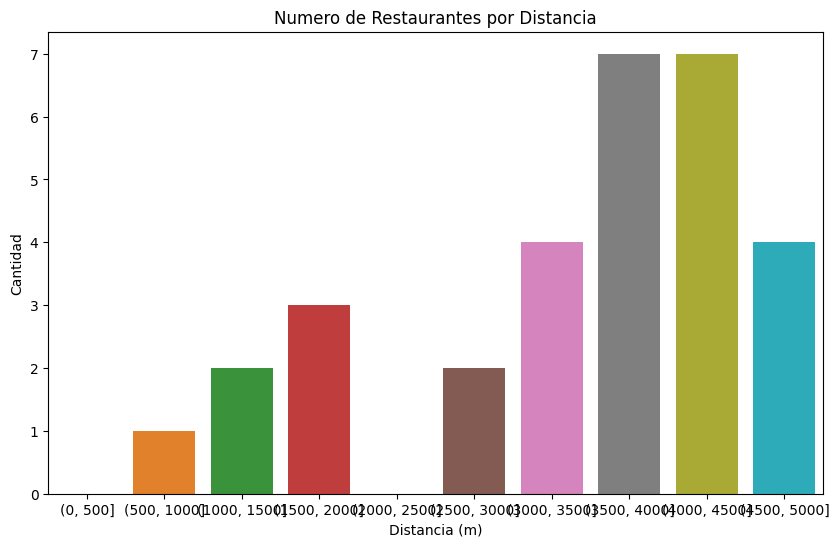

In [31]:
create_distance_histogram(df)

### Ahora hagamos una comparacion de diferentes sitios para saber cuales tienen este tipo de restaurantes cerca

In [25]:
search_query = 'Seafood'
radius = 1000

In [26]:
add1 = 'Av. Adolfo López Mateos Sur 830, Chapalita, 44500 Guadalajara, Jal., México'
loc1, df1 = get_restaurant_data(add1, search_query, radius)

In [27]:
add2 = 'Observatorio, 44266 Guadalajara, Jal., México'
loc2, df2 = get_restaurant_data(add2, search_query, radius)

In [28]:
add3 = 'Diego Valadés Ríos 99 - 1, Desarrollo Urbano Tres Ríos, 80020 Culiacán Rosales, Sin., México'
loc3, df3 = get_restaurant_data(add3, search_query, radius)

In [39]:
def get_names(loc):
    names = []
    for i in range(len(loc)):
        names.append(loc[i].address.split(',')[0])
    return names

hotel_names = get_names([loc1, loc2, loc3])

def create_distance_histogram_subplot(dfs, subplot_dim):
    nrows, ncols = subplot_dim
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))

    for i, df in enumerate(dfs):
        # Bin the restaurants based on distance in increments of 100 meters
        bins = range(0, 1250, 250)
        distance_binned = pd.cut(df['distance'], bins=bins)

        # Count the number of restaurants in each distance bin
        counts = distance_binned.value_counts().sort_index()

        # Plot the histogram with seaborn
        row = i // ncols
        col = i % ncols
        ax = sns.barplot(x=counts.index.astype(str), y=counts.values, ax=axs[row, col])
        plt.subplots_adjust(hspace=0.3)
        ax.set(xlabel='Distancia (m)', ylabel='Cantidad')
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
        ax.set_title(f'Numero de Restaurantes alrededor del\n {hotel_names[i]}')

    plt.show()

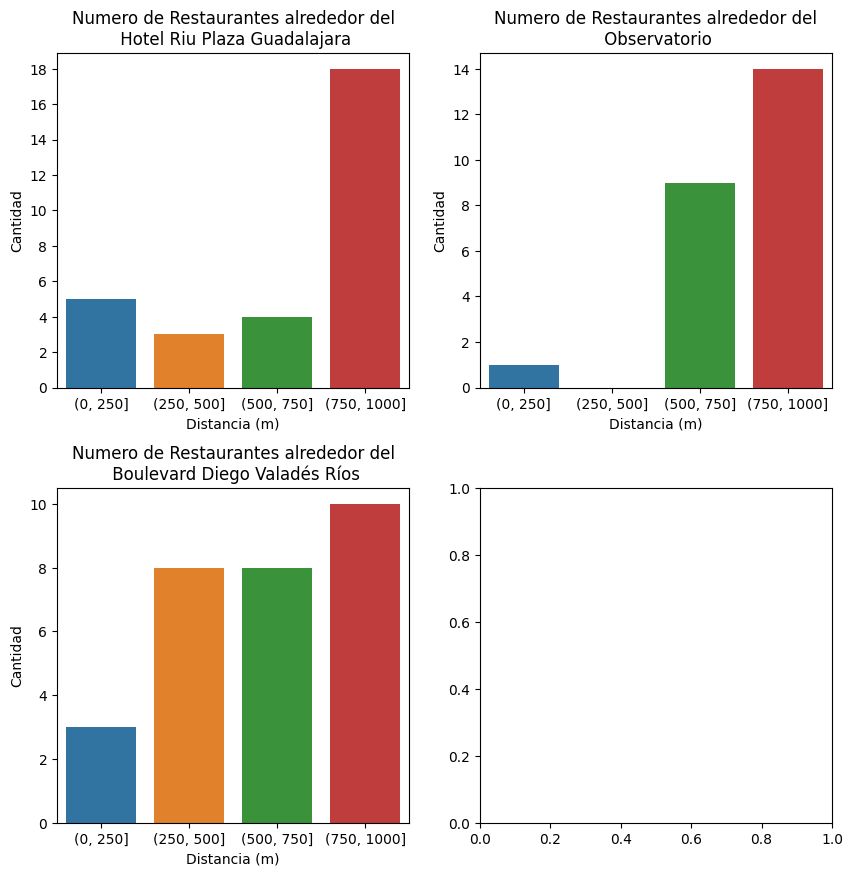

In [42]:
dfs = [df1, df2, df3]
create_distance_histogram_subplot(dfs, (2, 2))